In [18]:
#Imports all required packages from saved location
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
#import lightgbm as lgb

In [19]:
data = pd.read_csv ('/Users/charlieargent/Desktop/University of Exeter/Year 3/AI Project/dataset.csv')
print (data)



      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
5        0   43        2.0              0         0.0     0.0   
6        0   63        1.0              0         0.0     0.0   
7        0   45        2.0              1        20.0     0.0   
8        1   52        1.0              0         0.0     0.0   
9        1   43        1.0              1        30.0     0.0   
10       0   50        1.0              0         0.0     0.0   
11       0   43        2.0              0         0.0     0.0   
12       1   46        1.0              1        15.0     0.0   
13       0   41        3.0              0         0.0     1.0   
14       0   39        2.

In [20]:
pd.options.display.max_columns


20

In [21]:
data


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [22]:
#Changes the name of a few columns, in format: {old name, new name}
data = data.rename(columns={"male": "Sex_male"})
data = data.rename(columns={"age": "Age"})
data = data.rename(columns={"currentSmoker": "Smoker"})
data = data.rename(columns={"heartRate": "HeartRate"})
data = data.rename(columns={"glucose": "Glucose"})

In [23]:
#Checks how many missing values there are
data.isnull().sum()


Sex_male             0
Age                  0
education          105
Smoker               0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
HeartRate            1
Glucose            388
TenYearCHD           0
dtype: int64

In [24]:
#Drops any rows with missing data
data.dropna(axis=0,inplace=True)


In [25]:
#Checks for missing values again
data.isnull().sum()

Sex_male           0
Age                0
education          0
Smoker             0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
HeartRate          0
Glucose            0
TenYearCHD         0
dtype: int64

In [26]:
labels = data.pop("TenYearCHD").values
data = data.values
#gives the 10 year CHD data the name labels, this is so it can be called specifically later on in code

In [33]:
#split dataset in features and target variable
feature_cols = ['sex_male', 'Age', 'Smoker', 'cigsPerDay','BPMeds','prevalentStroke','prevelantHyp', 'diabetes','totChol','sysBP','Education','diaBP','BMI','HeartRate','Glucose']
X = feature_cols # Features
y = labels # Target variable

In [34]:
#Creates test and training sets 
x_train, x_test, y_train, y_test = train_test_split(data, labels,
                                                    test_size=.2,
                                                    random_state=5)

In [35]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [36]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.755464480874317


In [37]:
# Create Decision Tree classifer object
clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8579234972677595


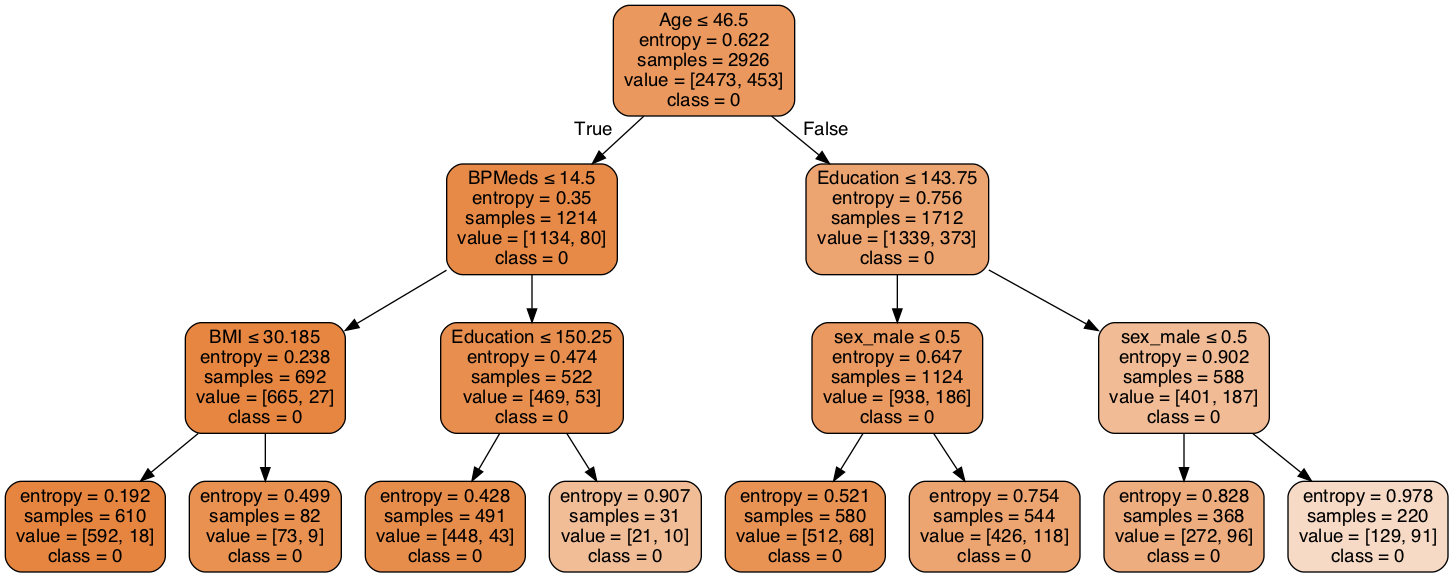

In [38]:
#code used to create a .png file of the actual decision tree process
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')

Image(graph.create_png())